In [4]:
import pandas as pd # library
import numpy as np  # library
from vsm import neighbors # Mine
import chants # Mine

In [19]:
VSM = pd.read_csv('MarketVSM_prototype',index_col=0)
Language_VSM = pd.read_csv('pmi_retro.csv',index_col=0)

### Traditional Language Model return the most similar words to a given word
#### Here I ask it for the 6 most similar words (concepts) to 'Fear'

In [27]:
neighbors('fear',Language_VSM).head(7)

fear       0.000000
concern    0.327244
worry      0.332161
fears      0.363645
suffer     0.377285
anxiety    0.406096
danger     0.421854
dtype: float64

### My Market Model return the most similar firms to a chosen stock. 
#### Here I ask it for the 19 most similar stocks to Google :
 - Apple, Equifax, Microsoft, S&P500, Western Union, Visa, Exxon, DirectTv (data is from 2011), and Intel.

In [50]:
neighbors('GOOG',VSM).head(10)

GOOG    0.000000
AAPL    0.053673
EFX     0.061796
MSFT    0.062667
SPY     0.065006
WU      0.069709
V       0.071892
XOM     0.072420
DTV     0.073771
INTC    0.074070
dtype: float64

## Using model to identify statistically correlated stocks
Let's use Nvidia as an example.

In [29]:
neighbors('NVDA',VSM).head()

NVDA    0.000000
AMAT    0.162725
GLW     0.172122
MU      0.172264
MOLX    0.182275
dtype: float64

- **AMAT**---> Applied Materials Inc: Firm that performs engineering tasks for semiconductor chips

- **GLW**----> Corning Inc: American multinational technology company that specializes in specialty glass, ceramics, and related materials and technologies including advanced optics, primarily for industrial and scientific applications.

- **MU**---> Micron Tech: producer of computer memory and computer data storage including dynamic random-access memory...

- **MOLX**----> Molex: manufacturer of electronic, electrical, and fiber optic connectivity systems. Molex offers over 100,000 products across a variety of industries, including data communications...
 

If you bought each stock at the start of 2011, your returns appear like

<AxesSubplot:>

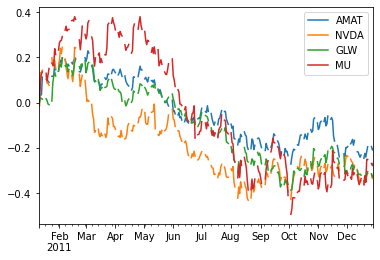

In [37]:
start = '2011-01-10'
end = '2011-12-29'
dates = pd.date_range(start,end)
df = chants.get_data(['AMAT','NVDA','GLW','MU'],dates)
df.drop('SPY',inplace=True,axis=1)
((df/df.iloc[0,:])-1).plot()

#### The Usefuleness of the Model
The model places Applied Materials (AMAT) as most similar to Nvidia. It's nuanced enough, though, that it doesn't simply place NVDA as the most similar to AMAT. If they made the same things at the same scale for the same people (like Coke and Pepsi), that might make sense. But if they occupy different spaces in the market, AMAT might be most similar to NVDA but it might have different neighbors.

NVDA produces graphics cards while AMAT performs specialized services in the microchip industry

In [33]:
neighbors('AMAT',VSM).head(15)

AMAT    0.000000
KLAC    0.047788
LRCX    0.053221
APH     0.056663
MOLX    0.057736
GLW     0.062083
JEC     0.063726
NUE     0.067575
XLNX    0.067622
TXN     0.068946
QLGC    0.069443
DD      0.069552
BEN     0.069648
ADI     0.070304
TEL     0.071097
dtype: float64

We see NVDA doesn't even make the top 15. I won't write out the full list but the closest four are

- **KLAC**: supplies process control and yield management systems for the semiconductor industry and other related nanoelectronics

- **LRCX**: supplier of wafer fabrication equipment and related services to the semiconductor industry

- **APH**: major producer of electronic and fiber optic connectors, cable and interconnect systems
- **MOLX**: (was on NVDA's nearest neighbor) manufacturer of connectivity systems.

If you want to read into this, you can be happy that the nearest two neighbors perform specialized services in the microchip industry before generalizing to system electronic.

I'll plot the returns for this group as well, but to make the comparisons easier I'll plot the previous chart with NVDA, AMAT, GLW, and MU first.

<AxesSubplot:>

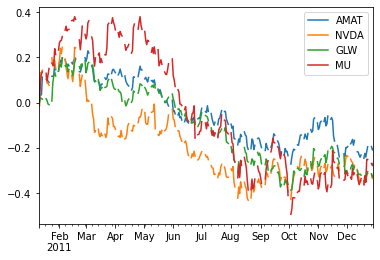

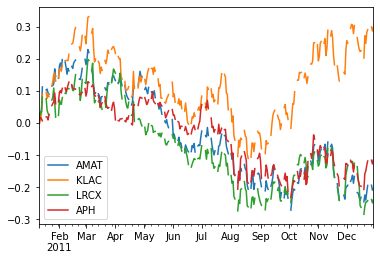

In [39]:
((df/df.iloc[0,:])-1).plot()
df1 = chants.get_data(['AMAT','KLAC','LRCX','APH'],dates)
df1.drop('SPY',inplace=True,axis=1)
((df1/df1.iloc[0,:])-1).plot()

I'm not going to color code it for times sake, sorry. AMAT, in blue, is the common stock between both sets. You can see if we treat it as the chosen stock, it's personal story is reflected by the group of stocks most similar to it. Both sets share an overall theme though. You can see how this might produce a lot of potentially correlated stocks. The next step would be to validate them using traditional methods.

END

I probably should have plotted the S&P500 to show where the market was at.

<AxesSubplot:>

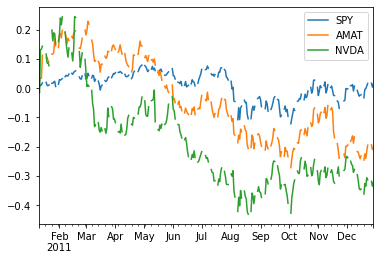

In [43]:
df = chants.get_data(['SPY','AMAT','NVDA'],dates)
((df/df.iloc[0,:])-1).plot()